In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_women_entrepeneur = 'C:/Users/Javi/00_raw_data/women_entrepeneur.csv'

In [3]:
women = pd.read_csv(path_women_entrepeneur,
                    sep=';')

In [4]:
print(women.shape)
print(women.dtypes)
women.head()

(51, 9)
No                                         int64
Country                                   object
Level of development                      object
European Union Membership                 object
Currency                                  object
Women Entrepreneurship Index             float64
Entrepreneurship Index                   float64
Inflation rate                           float64
Female Labor Force Participation Rate    float64
dtype: object


,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


#### Percent of NaN

In [5]:
nans = pd.DataFrame(women.isna().mean(), columns=['percent of NaN'])
nans

,percent of NaN
No,0.0
Country,0.0
Level of development,0.0
European Union Membership,0.0
Currency,0.0
Women Entrepreneurship Index,0.0
Entrepreneurship Index,0.0
Inflation rate,0.0
Female Labor Force Participation Rate,0.0


In [6]:
women['European Union Membership'].value_counts()

Not Member    31
Member        20
Name: European Union Membership, dtype: int64

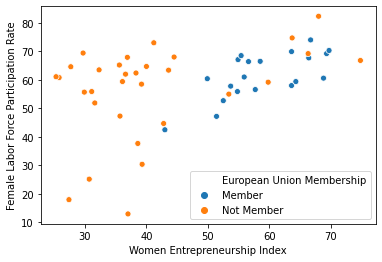

In [43]:
sns.scatterplot(data=women,
                x='Women Entrepreneurship Index',
                y='Female Labor Force Participation Rate',
                hue='European Union Membership')

<BarContainer object of 2 artists>

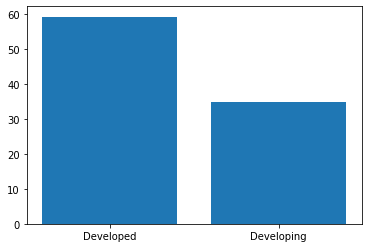

In [29]:
group = women.groupby('Level of development').mean()
plt.bar(x=group.index, height=group['Women Entrepreneurship Index'])

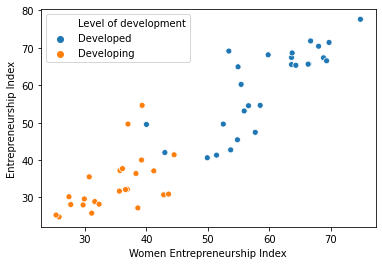

In [31]:
sns.scatterplot(data=women,
                x='Women Entrepreneurship Index',
                y='Entrepreneurship Index',
                hue='Level of development')

Adding a new column for further analysis called ratio.

In [38]:
women['Ratio'] = np.round(women['Women Entrepreneurship Index'].values / women['Entrepreneurship Index'].values, 2)

In [44]:
women.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Ratio
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,0.85
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,0.97
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,0.92
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,1.01
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,1.02


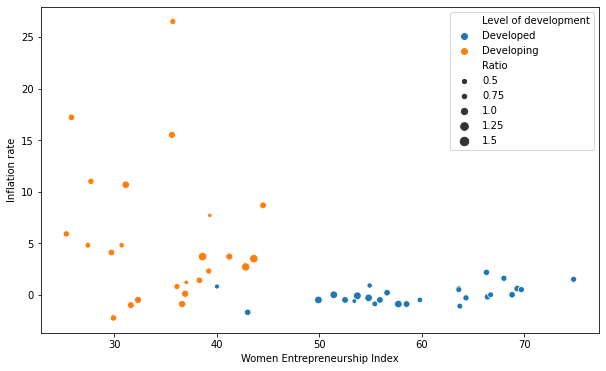

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=women,
                x='Women Entrepreneurship Index',
                y='Inflation rate',
                hue='Level of development',
                size='Ratio')

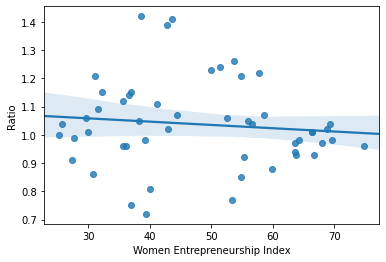

In [53]:
sns.regplot(data=women,
                x='Women Entrepreneurship Index',
                y='Ratio')